In [2]:
#Import the frameworks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#Import the algorithms
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [3]:
#Load the CSV file in a DF
data = pd.read_csv(r"C:\\Users\\cvveljanovski\\Desktop\\Learning\\DataScience\\Candy\\candy-data.csv")

In [4]:
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [46]:
# Order the candies by win percentage
Top10=data.sort_values(by=['winpercent'], ascending=False).head(10)

In [47]:
#Print the top 10 candies
Top10

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [48]:
Bottom10=data.sort_values(by=['winpercent'], ascending=False).tail(10)

In [49]:
#Print the bottom 10 candies
Bottom10

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341


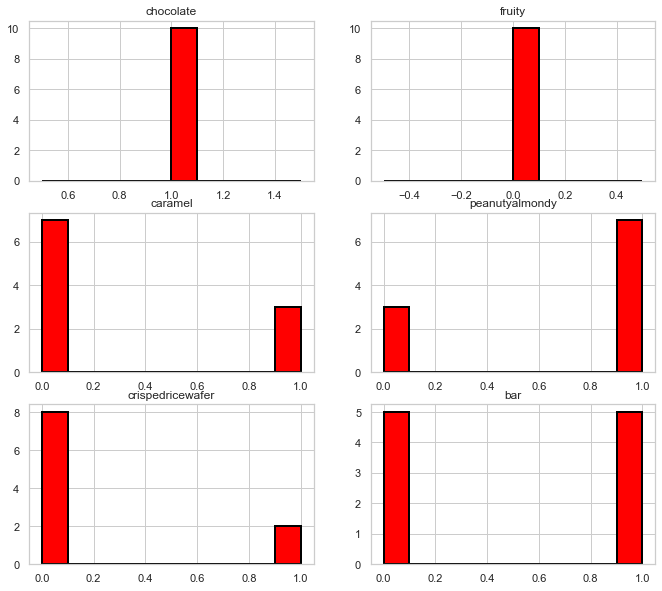

In [60]:
#Using histograms
Top10.chocolate.unique()
fig, axes = plt.subplots(3,2)
axes[0,0].hist(x="chocolate", data=Top10, edgecolor="black", linewidth=2, color="red")
axes[0,0].set_title("chocolate")
axes[0,1].hist(x="fruity", data=Top10, edgecolor="black", linewidth=2, color="red")
axes[0,1].set_title("fruity")
axes[1,0].hist(x="caramel", data=Top10, edgecolor="black", linewidth=2, color="red")
axes[1,0].set_title("caramel")
axes[1,1].hist(x="peanutyalmondy", data=Top10, edgecolor="black", linewidth=2, color="red")
axes[1,1].set_title("peanutyalmondy")
axes[2,0].hist(x="crispedricewafer", data=Top10, edgecolor="black", linewidth=2, color="red")
axes[2,0].set_title("crispedricewafer")
axes[2,1].hist(x="bar", data=Top10, edgecolor="black", linewidth=2, color="red")
axes[2,1].set_title("bar")
fig.set_size_inches(10,10)

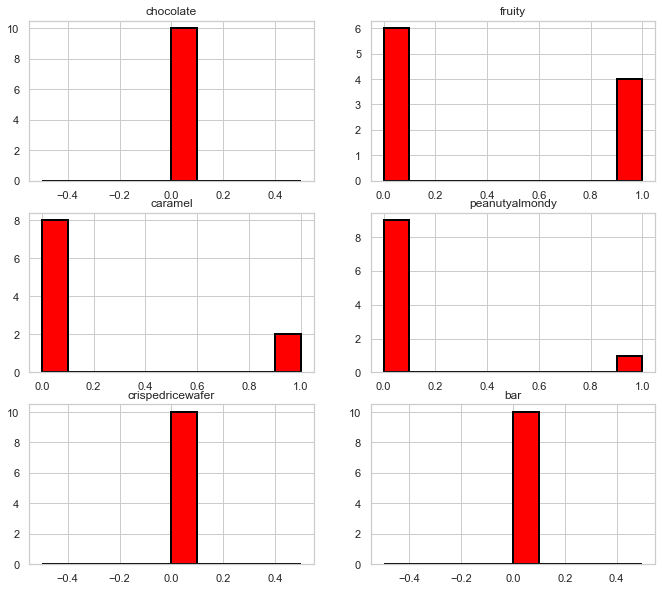

In [62]:
#Using histograms
Bottom10.chocolate.unique()
fig, axes = plt.subplots(3,2)
axes[0,0].hist(x="chocolate", data=Bottom10, edgecolor="black", linewidth=2, color="red")
axes[0,0].set_title("chocolate")
axes[0,1].hist(x="fruity", data=Bottom10, edgecolor="black", linewidth=2, color="red")
axes[0,1].set_title("fruity")
axes[1,0].hist(x="caramel", data=Bottom10, edgecolor="black", linewidth=2, color="red")
axes[1,0].set_title("caramel")
axes[1,1].hist(x="peanutyalmondy", data=Bottom10, edgecolor="black", linewidth=2, color="red")
axes[1,1].set_title("peanutyalmondy")
axes[2,0].hist(x="crispedricewafer", data=Bottom10, edgecolor="black", linewidth=2, color="red")
axes[2,0].set_title("crispedricewafer")
axes[2,1].hist(x="bar", data=Bottom10, edgecolor="black", linewidth=2, color="red")
axes[2,1].set_title("bar")
fig.set_size_inches(10,10)

Which qualities are associated with higher rankings?
From the graphs above we can see that a candy will win if it has:
1. Chocolate
2. No Fruity taste
3. Peanutty taste
4. Has a bar form

In [61]:
data.columns.unique()

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

A short description of the columns
1. Competitior name is the name of the company that makes the candy
2. Chocolate tells if there is chocolate in the candy
3. Fruity tells if there is a fruity taste in the candy
4. Caramel tells if there is caramel in the candy
5. peanutyalmondy tells if there is peanutyalmondy taste in the candy
6. nougat tells if there is a nougat in the candy
7. crispedricewafer if there is crispedricewafer in the candy
8. hard tells if the candy is hard
9. bar tells if the form of the candy is bar
10. pluribus tells if the form is pluribus
11. sugarpercent tells the percentage of sugar in the candy
12. pricepercent The unit price percentile compared to the rest of the set.
13. winpercent tells how many times the candy won when paired with another candy on the poll

1. Which qualities are associated with higher rankings?
2. What’s the most popular candy? Least popular?

In [6]:
#Check the datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [7]:
#Check if there are empty value cells
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Lets do the EDA(exploratory data analysis)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


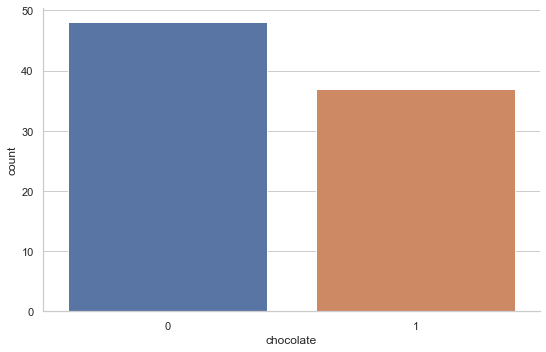

In [8]:
#Lets see the distribution of the candies with and without chocolate
sns.factorplot(x='chocolate', data=data, kind='count', size = 5, aspect=1.5)

We see there are more candies without chocolate

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


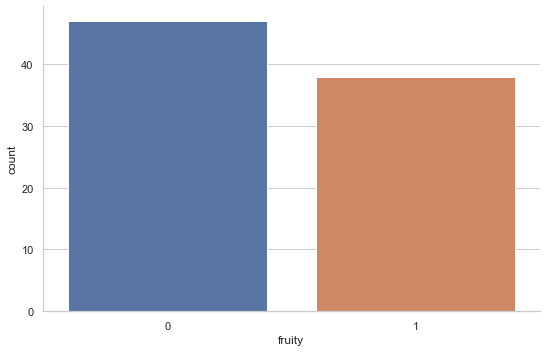

In [9]:
#Lets see the distribution of the candies with and without fruity taste
sns.factorplot(x='fruity', data=data, kind='count', size = 5, aspect=1.5)

We see there are more candies without fruit

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


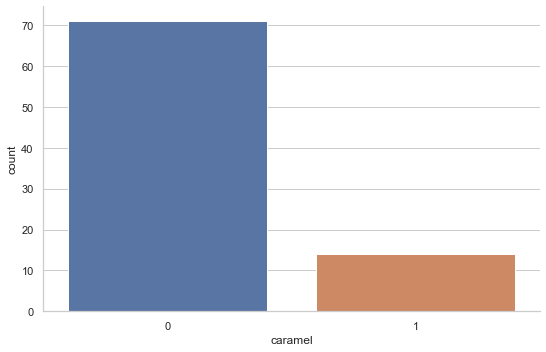

In [10]:
#Lets see the distribution of the candies with and without caramel
sns.factorplot(x='caramel', data=data, kind='count', size = 5, aspect=1.5)

We see there are way more candies without caramel

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


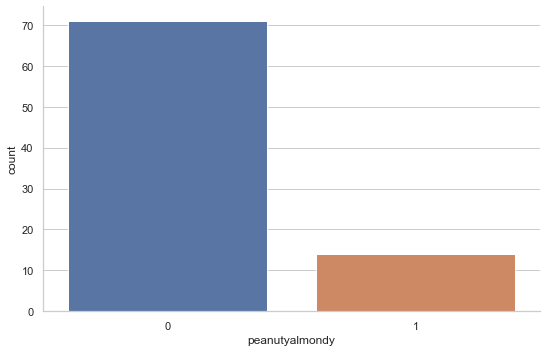

In [11]:
#Lets see the distribution of the candies with and without peanutyalmondy taste
sns.factorplot(x='peanutyalmondy', data=data, kind='count', size = 5, aspect=1.5)

We see there are way more candies without peanutyalmondy taste

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


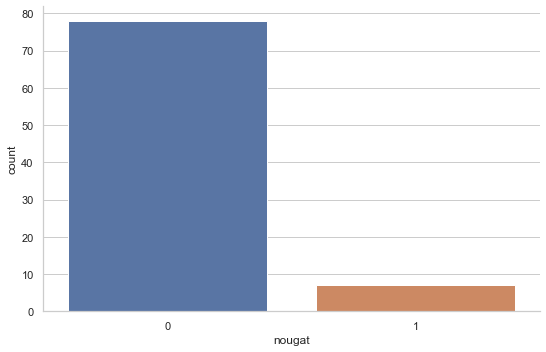

In [12]:
#Lets see the distribution of the candies with and without nougat
sns.factorplot(x='nougat', data=data, kind='count', size = 5, aspect=1.5)

We see there are a lot more candies without nugat

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


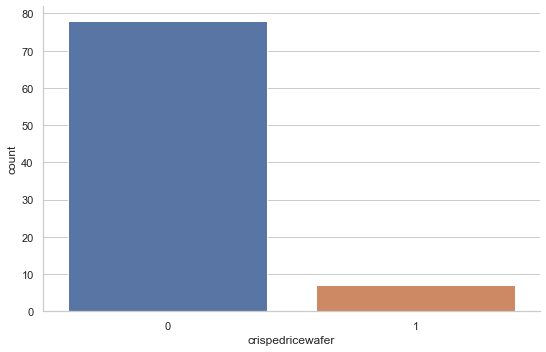

In [13]:
#Lets see the distribution of the candies with and without crispedricewafer
sns.factorplot(x='crispedricewafer', data=data, kind='count', size = 5, aspect=1.5)

We see there are a lot more candies without crispedricewafer

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


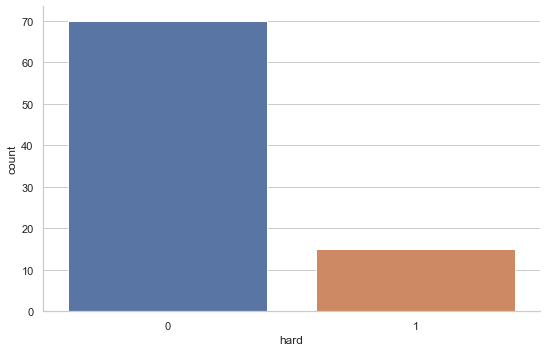

In [14]:
#Lets see the distribution of the candies that are hard
sns.factorplot(x='hard', data=data, kind='count', size = 5, aspect=1.5)

There are more soft than hard candies

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


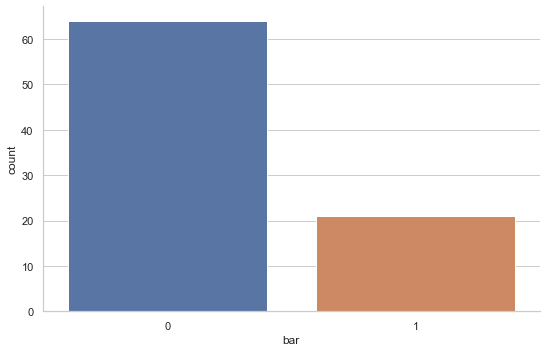

In [15]:
#Lets see the distribution of the candies with bar shape
sns.factorplot(x='bar', data=data, kind='count', size = 5, aspect=1.5)

We see that more candies don't have the shape of bar

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


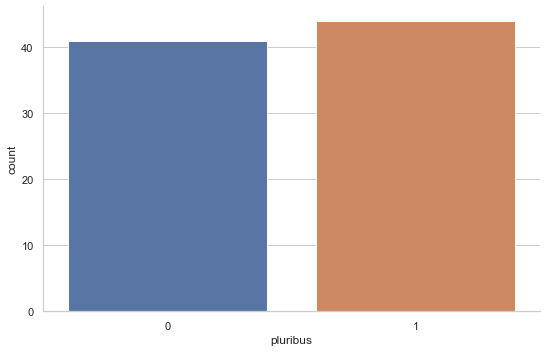

In [16]:
#Lets see the distribution of the pluribus candies
sns.factorplot(x='pluribus', data=data, kind='count', size = 5, aspect=1.5)

The distribution is quite equal

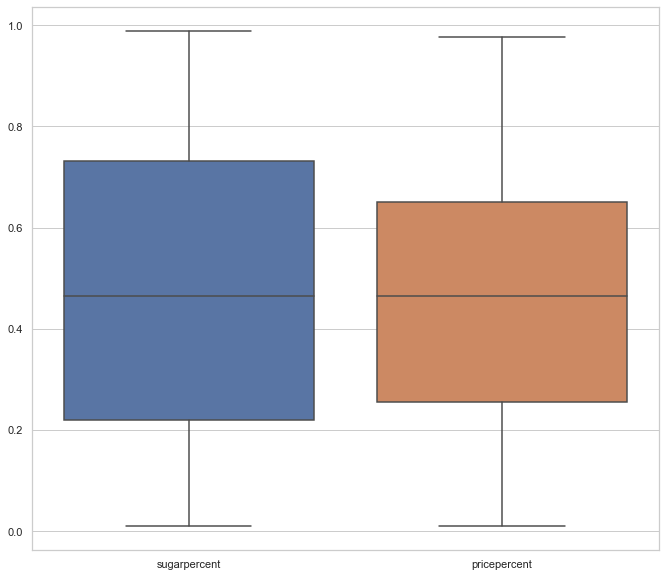

In [17]:
#Lets visualize the mean, min, max etc for sugar percent and price percent of the candies
sns.boxplot(data=data[["sugarpercent","pricepercent"]])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [18]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


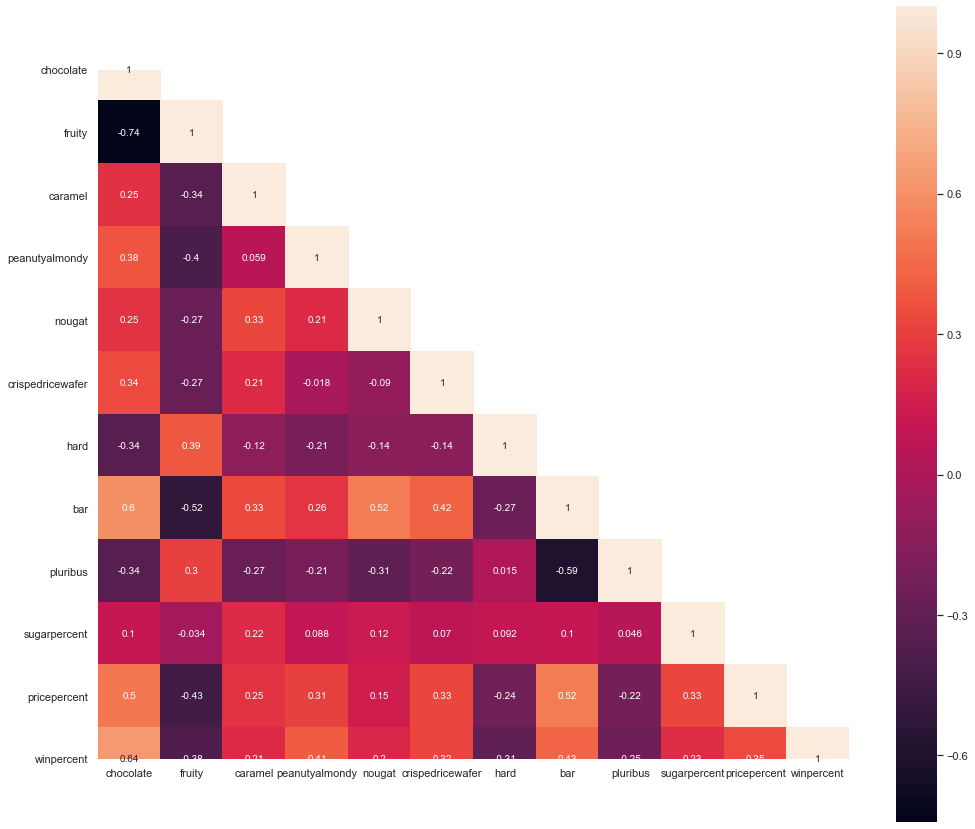

In [19]:
#Now lets see the correlation matrix to see how the variables are correlated among them selves
cor_mat=data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

From the above figure we can see that:
1. Chocolate has strong inverse correlation with fruity
2. Chocolate has high correlation with bar
3. Chocolate has high correlation with win percentage which means it has won more times
4. Fruity has high inverse correlation with bar
5. Fruity has high inverse correlation with pricepercent which means that the fruity candy is less expensive
6. Peanutyalmondy has high correlation with win percent 
7. Nougat has high correlation with bar
8. Crispedricewafer has high correlation with bar
9. Bar has inverse correlation with pluribus
10. Bar has high correlation with pricepercent
11. Bar has high correlation with winpercent

In [20]:
#2. What’s the most popular candy?
num = data['winpercent'].max()
data.loc[data['winpercent'] == num, 'competitorname']
#Result is "ReeseÕs Peanut Butter cup"

52    ReeseÕs Peanut Butter cup
Name: competitorname, dtype: object

In [21]:
#2. What’s the least popular candy?
out = data['winpercent'].min()
data.loc[data['winpercent'] == 22.445341, 'competitorname']
#Result is "Nik L Nip"

44    Nik L Nip
Name: competitorname, dtype: object

In [22]:
#Drop the column with textual data
df = data.drop("competitorname", axis=1)
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [24]:
#Split the dataset into training and test
x_train, x_test, y_train, y_test = train_test_split(df.drop("winpercent",axis=1),df['winpercent'],test_size=0.25, random_state=0)

Bellow we will perform a regression test with different algorithms and we will try different error measurement methods:

In [63]:
#Using mean_squared_log_error lets see which algorithms will work the best
#This is a regression problem so we have to use regression algorithms
#In Models select which algorithms you want to use to train different models and using mean_squared error see which one has the smallest error
models=[SVR(),KNeighborsRegressor(),RidgeCV(),Lasso(),BaggingRegressor(),GradientBoostingRegressor(), KNeighborsRegressor()]
model_names=["SVR","KNeighborsRegressor","RidgeCV","Lasso","BaggingRegressor","GradientBoostingRegressor", "KNeighborsRegressor"]
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names1,'RMSLE':rmsle}   
d

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'Modelling Algo': ['SVR',
  'KNeighborsRegressor',
  'RidgeCV',
  'Lasso',
  'BaggingRegressor',
  'GradientBoostingRegressor',
  'KNeighborsRegressor'],
 'RMSLE': [0.2763830993460817,
  0.27418520197921914,
  0.2580885036546274,
  0.25953576523964483,
  0.20745082653161492,
  0.24500934535208466,
  0.27418520197921914]}

In [64]:
#Lets show the results in a table for better view
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,SVR,0.276383
1,KNeighborsRegressor,0.274185
2,RidgeCV,0.258089
3,Lasso,0.259536
4,BaggingRegressor,0.207451
5,GradientBoostingRegressor,0.245009
6,KNeighborsRegressor,0.274185


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

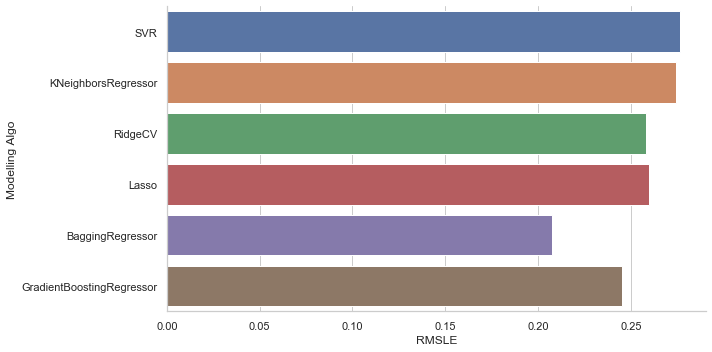

In [65]:
#Lets show it with a graph now
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

We can see that SVR, KNeighbors Regressor, RidgeCV and Lasso algorithms are performing the best

In [66]:
#Using mean_squared_error lets see which algorithm will work the best
#This is a regression problem so we have to use regression algorithms
#In Models select which algorithms you want to use to train different models and using mean_squared error see which one has the smallest error
models1=[SVR(),BaggingRegressor(),KNeighborsRegressor(),LinearRegression(),Ridge(),RidgeCV(),Lasso(),RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(), KNeighborsRegressor()]
model_names1=["SVR","BaggingRegressor","KNeighborsRegressor","LinearRegression","Ridge","RidgeCV","Lasso","RandomForestRegressor","BaggingRegressor","GradientBoostingRegressor","AdaBoostRegressor", "KNeighborsRegressor"]
mse=[]
d1={}
for model1 in range (len(models1)):
    clf1=models1[model1]
    clf1.fit(x_train,y_train)
    test_pred1=clf1.predict(x_test)
    mse.append(np.sqrt(mean_squared_error(test_pred1,y_test)))
d1={'Modelling Algo':model_names1,'MSE':mse}   
d1

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Modelling Algo': ['SVR',
  'BaggingRegressor',
  'KNeighborsRegressor',
  'LinearRegression',
  'Ridge',
  'RidgeCV',
  'Lasso',
  'RandomForestRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor',
  'AdaBoostRegressor',
  'KNeighborsRegressor'],
 'MSE': [12.281942724136815,
  9.520305417320866,
  11.983675473773985,
  10.188636516884431,
  10.146483719995377,
  11.094102646121877,
  11.274470948321886,
  9.529640337578858,
  10.075685827071013,
  10.032374713086444,
  10.253872309576122,
  11.983675473773985]}

In [67]:
#Lets show the results in a table for better view
mse_frame=pd.DataFrame(d1)
mse_frame

,Modelling Algo,MSE
0,SVR,12.281943
1,BaggingRegressor,9.520305
2,KNeighborsRegressor,11.983675
3,LinearRegression,10.188637
4,Ridge,10.146484
5,RidgeCV,11.094103
6,Lasso,11.274471
7,RandomForestRegressor,9.529640
8,BaggingRegressor,10.075686
9,GradientBoostingRegressor,10.032375


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

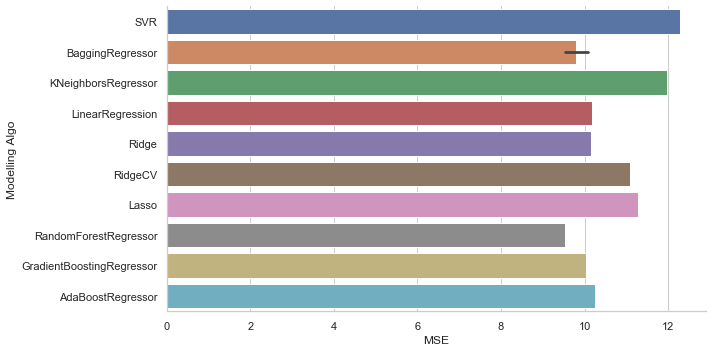

In [69]:
#Lets show it with a graph now
sns.factorplot(y='Modelling Algo',x='MSE',data=mse_frame,kind='bar',size=5,aspect=2)

We can see that Random Forest Regressor and Bagging Regressor are performing the best

In [75]:
#Using r2_score lets see which algorithm will work the best
#This is a regression problem so we have to use regression algorithms
#In Models select which algorithms you want to use to train different models and using mean_squared error see which one has the smallest error
models2=[BaggingRegressor(),LinearRegression(),RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor()]
model_names2=["BaggingRegressor","LinearRegression","RandomForestRegressor","BaggingRegressor","GradientBoostingRegressor"]
R2=[]
d2={}
for model2 in range (len(models2)):
    clf2=models2[model2]
    clf2.fit(x_train,y_train)
    test_pred2=clf2.predict(x_test)
    R2.append(np.sqrt(r2_score(test_pred2,y_test)))
d2={'Modelling Algo':model_names2,'R2':R2}   
d2

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Modelling Algo': ['BaggingRegressor',
  'LinearRegression',
  'RandomForestRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor'],
 'R2': [0.47984949322556103,
  0.3283700369973328,
  0.6410946288966543,
  0.6007107426519679,
  0.5064648289311342]}

In [76]:
#Lets show the results in a table for better view
R2_frame=pd.DataFrame(d2)
R2_frame

,Modelling Algo,R2
0,BaggingRegressor,0.479849
1,LinearRegression,0.328370
2,RandomForestRegressor,0.641095
3,BaggingRegressor,0.600711
4,GradientBoostingRegressor,0.506465


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

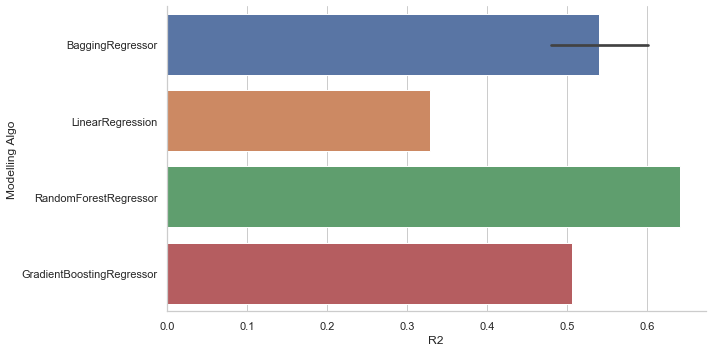

In [77]:
#Lets show it with a graph now
sns.factorplot(y='Modelling Algo',x='R2',data=R2_frame,kind='bar',size=5,aspect=2)

We can see that Random Forest Regressor performs the best

In [79]:
#Using mean_absolute_error lets see which algorithm will work the best
#This is a regression problem so we have to use regression algorithms
#In Models select which algorithms you want to use to train different models and using mean_squared error see which one has the smallest error
models3=[SVR(),BaggingRegressor(),KNeighborsRegressor(),LinearRegression(),Ridge(),RidgeCV(),Lasso(),RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(), KNeighborsRegressor()]
model_names3=["SVR","BaggingRegressor","KNeighborsRegressor","LinearRegression","Ridge","RidgeCV","Lasso","RandomForestRegressor","BaggingRegressor","GradientBoostingRegressor","AdaBoostRegressor", "KNeighborsRegressor"]
mae=[]
d3={}
for model3 in range (len(models3)):
    clf3=models3[model3]
    clf3.fit(x_train,y_train)
    test_pred3=clf3.predict(x_test)
    mae.append(np.sqrt(mean_absolute_error(test_pred3,y_test)))
d3={'Modelling Algo':model_names3,'MAE':mae}   
d3

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Modelling Algo': ['SVR',
  'BaggingRegressor',
  'KNeighborsRegressor',
  'LinearRegression',
  'Ridge',
  'RidgeCV',
  'Lasso',
  'RandomForestRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor',
  'AdaBoostRegressor',
  'KNeighborsRegressor'],
 'MAE': [3.2309269826479246,
  2.799128559927178,
  2.9810317814169953,
  2.853265247073557,
  2.821356700330481,
  3.022915727521222,
  3.0840763728696228,
  2.562301196279342,
  2.8240511876074894,
  2.853921083461501,
  2.8164009948857234,
  2.9810317814169953]}

In [80]:
#Lets show the results in a table for better view
mae_frame=pd.DataFrame(d3)
mae_frame

,Modelling Algo,MAE
0,SVR,3.230927
1,BaggingRegressor,2.799129
2,KNeighborsRegressor,2.981032
3,LinearRegression,2.853265
4,Ridge,2.821357
5,RidgeCV,3.022916
6,Lasso,3.084076
7,RandomForestRegressor,2.562301
8,BaggingRegressor,2.824051
9,GradientBoostingRegressor,2.853921


C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

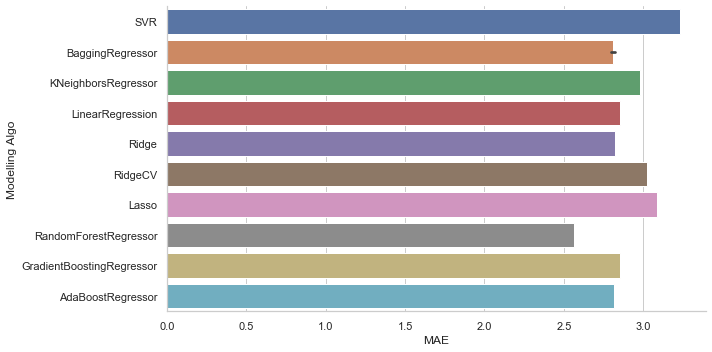

In [81]:
#Lets show it with a graph now
sns.factorplot(y='Modelling Algo',x='MAE',data=mae_frame,kind='bar',size=5,aspect=2)

We can see that Random Forest Regressor works the best